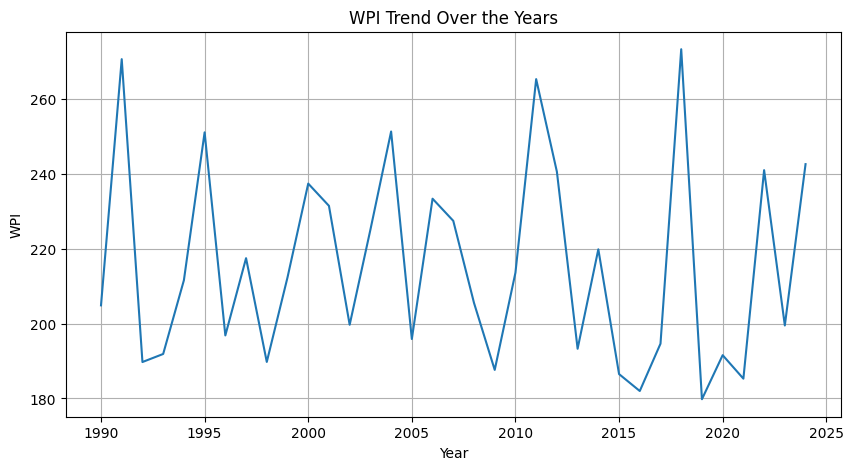

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

ARIMA RMSE: 32.17044581957911, MAPE: 0.14481546024915376
Random Forest RMSE: 38.46876729382919, MAPE: 0.1665602969414433


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
LSTM RMSE: 130.31274989198278, MAPE: 0.6045447493593292
ARIMA: RMSE = 32.17044581957911, MAPE = 0.14481546024915376
Random Forest: RMSE = 38.46876729382919, MAPE = 0.1665602969414433
LSTM: RMSE = 130.31274989198278, MAPE = 0.6045447493593292


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/WPI_Data.xlsx"
data = pd.read_excel(file_path, sheet_name="data")

# Convert Year to DateTime index
data.set_index("Year", inplace=True)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.lineplot(x=data.index, y=data["WPI"])
plt.xlabel("Year")
plt.ylabel("WPI")
plt.title("WPI Trend Over the Years")
plt.grid()
plt.show()

# Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# ARIMA Model
arima_model = ARIMA(train["WPI"], order=(2,1,2))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(len(test))

# Evaluate ARIMA
arima_rmse = np.sqrt(mean_squared_error(test["WPI"], arima_pred))
arima_mape = mean_absolute_percentage_error(test["WPI"], arima_pred)
print(f"ARIMA RMSE: {arima_rmse}, MAPE: {arima_mape}")

# Random Forest Model
X = np.array(data.index).reshape(-1, 1)
y = data["WPI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)
print(f"Random Forest RMSE: {rf_rmse}, MAPE: {rf_mape}")
# LSTM Model
X_lstm = np.array(data.index).reshape(-1, 1)
y_lstm = np.array(data["WPI"])
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)
# Reshape input for LSTM
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, 1))
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1,1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, verbose=0)
lstm_pred = lstm_model.predict(X_test_lstm).flatten()
# Evaluate LSTM
lstm_rmse = np.sqrt(mean_squared_error(y_test_lstm, lstm_pred))
lstm_mape = mean_absolute_percentage_error(y_test_lstm, lstm_pred)
print(f"LSTM RMSE: {lstm_rmse}, MAPE: {lstm_mape}")
# Compare Model Performance
models = ["ARIMA", "Random Forest", "LSTM"]
rmse_scores = [arima_rmse, rf_rmse, lstm_rmse]
mape_scores = [arima_mape, rf_mape, lstm_mape]

for i, model in enumerate(models):
    print(f"{model}: RMSE = {rmse_scores[i]}, MAPE = {mape_scores[i]}")